In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout, MaxPooling2D, Add
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.regularizers import l2, l1
from tensorflow.keras import layers, models, regularizers

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1./255)

# MFCC CNN

In [3]:

training_set_mfcc = train_datagen.flow_from_directory('/kaggle/input/dl-20242025-itera-west-indonesia-birds-dataset/split_data/mfcc_split/train',
                                                 target_size = (64, 64),
                                                 shuffle=True)

val_set_mfcc = test_datagen.flow_from_directory('/kaggle/input/dl-20242025-itera-west-indonesia-birds-dataset/split_data/mfcc_split/val',
                                            target_size = (64, 64),
                                            shuffle=False)

Found 5364 images belonging to 6 classes.
Found 1377 images belonging to 6 classes.


In [ ]:
def create_model3():
    model=models.Sequential()
    
    # Convolutional Layer 1
    model.add(layers.Conv2D(64, (2, 2), activation='relu',  input_shape=(64, 64, 3), padding='same'))
    model.add(layers.Conv2D(64, (2, 2), activation='relu',  padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Convolutional Layer 2
    model.add(layers.Conv2D(128, (2, 2), activation='relu',  padding='same'))
    model.add(layers.Conv2D(128, (2, 2), activation='relu',  padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(256, (2, 2), activation='relu',  padding='same'))
    model.add(layers.Conv2D(256, (2, 2), activation='relu',  padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Dropout(0.3))

    # Convolutional Layer 4
    model.add(layers.Conv2D(512, (3, 3), activation='relu',  padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu',  padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Dropout(0.5))
    
    # Flatten Layer
    model.add(layers.Flatten())
    # Fully Connected Layer 1
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(layers.Dropout(0.25))
    
    # Fully Connected Layer 2
    model.add(layers.Dense(2048, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(layers.Dropout(0.25))

    # Fully Connected Layer 3
    model.add(layers.Dense(1024, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(layers.Dropout(0.3))

    # Fully Connected Layer 4
    model.add(layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(layers.Dropout(0.3))

    # Fully Connected Layer 5
    model.add(layers.Dense(6, activation='softmax'))  # Ganti 10 dengan jumlah kelas yang sesuai
    
    return model

model_mfcc2=create_model3()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import tensorflow as tf

# Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compile model dengan Adam
model_mfcc2.compile(optimizer=optimizer,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# fungsi learning rate schedule function
def lr_schedule(epoch, lr):
    if epoch > 10:
        lr = lr * 0.9  #mengurangi learning rate setelah epoch ke-10
    return lr

# LearningRateScheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# Early Stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=5,  # Berhenti jika tidak ada perbaikan selama 5 epoch
    min_delta=0.001,  # Perbaikan minimal yang dianggap signifikan
    restore_best_weights=True  # Kembalikan bobot terbaik sebelum berhenti
)

# Display model summary
model_mfcc2.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    33,558,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2048)           │     8,390,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,624,774 (185.49 MB)

 Trainable params: 48,624,774 (185.49 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from keras.callbacks import History
history = History()

History_mfcc2 = model_mfcc2.fit(
    training_set_mfcc, validation_data = val_set_mfcc,
    batch_size=32,
    epochs=50,
    callbacks=[lr_scheduler, early_stopping, history]
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1734003935.291083     196 service.cc:145] XLA service 0x7c88e0008910 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734003935.291149     196 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734003935.291154     196 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  2/168 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.1094 - loss: 12.0137   

I0000 00:00:1734003951.169458     196 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


168/168 ━━━━━━━━━━━━━━━━━━━━ 121s 587ms/step - accuracy: 0.2621 - loss: 9.7615 - val_accuracy: 0.3479 - val_loss: 5.4537 - learning_rate: 1.0000e-04
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 46s 264ms/step - accuracy: 0.2918 - loss: 4.7415 - val_accuracy: 0.3406 - val_loss: 3.3991 - learning_rate: 1.0000e-04
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 46s 262ms/step - accuracy: 0.3954 - loss: 3.0641 - val_accuracy: 0.3515 - val_loss: 2.6343 - learning_rate: 1.0000e-04
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 46s 264ms/step - accuracy: 0.4099 - loss: 2.4338 - val_accuracy: 0.3500 - val_loss: 2.3306 - learning_rate: 1.0000e-04
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 45s 260ms/step - accuracy: 0.3937 - loss: 2.1457 - val_accuracy: 0.3784 - val_loss: 2.2058 - learning_rate: 1.0000e-04
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 45s 260ms/step - accuracy: 0.4200 - loss: 1.9299 - val_accuracy: 0.3704 - val_loss: 2.0505 - learning_rate: 1.0000e-04
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 46s 264ms/step -

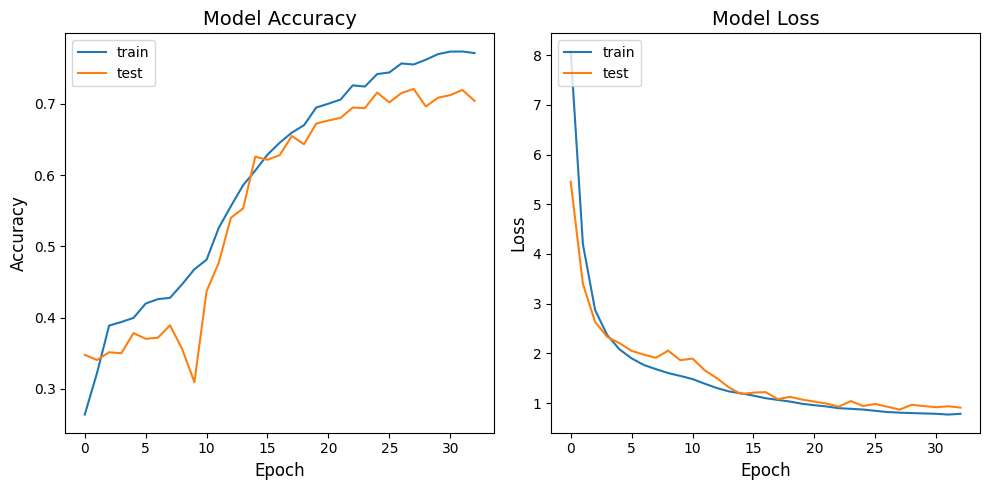

In [8]:
import matplotlib.pyplot as plt

# Membuat figure dan axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot akurasi
ax1.plot(History_mfcc2.history['accuracy'], label='train')
ax1.plot(History_mfcc2.history['val_accuracy'], label='test')
ax1.set_title('Model Accuracy', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.legend(loc='upper left')

# Plot loss
ax2.plot(History_mfcc2.history['loss'], label='train')
ax2.plot(History_mfcc2.history['val_loss'], label='test')
ax2.set_title('Model Loss', fontsize=14)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.legend(loc='upper left')

# Menampilkan plot
plt.tight_layout()
plt.show()

44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - accuracy: 0.7732 - loss: 0.7878
Val Accuracy: 0.7211328744888306
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step
Confusion Matrix:
[[166  25   2   6   1  18]
 [ 20 108   5  23  11  10]
 [ 24   2 443   2   0   8]
 [  5  13   5 137  30   0]
 [  1  17   0  99  61   3]
 [ 15   6  23   4   6  78]]


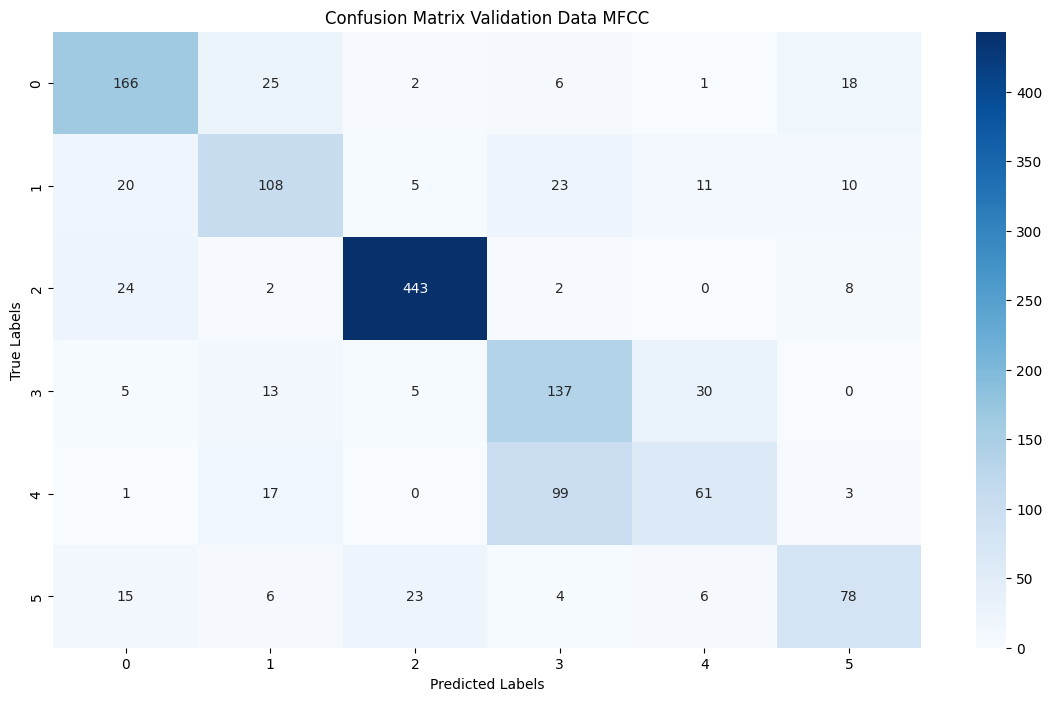


Classification Report:
              precision    recall  f1-score   support

      0Pitta       0.72      0.76      0.74       218
      1Dryoc       0.63      0.61      0.62       177
      2Capri       0.93      0.92      0.93       479
      3Pnoep       0.51      0.72      0.59       190
      4Anthi       0.56      0.34      0.42       181
      5Bucer       0.67      0.59      0.63       132

    accuracy                           0.72      1377
   macro avg       0.67      0.66      0.65      1377
weighted avg       0.72      0.72      0.72      1377



In [31]:
from sklearn.metrics import classification_report
# Evaluasi model
accuracy2 = model_mfcc2.evaluate(val_set_mfcc)
print('Val Accuracy:', accuracy2[1])

# Prediksi
pred2 = model_mfcc2.predict(val_set_mfcc)
y_pred2 = np.argmax(pred2, axis=1)

# True labels
y_true2 = val_set_mfcc.classes

# Confusion matrix
print('Confusion Matrix:')
conf_matrix2 = confusion_matrix(y_true2, y_pred2)
print(conf_matrix2)

# Visualisasi confusion matrix
f, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(conf_matrix2, annot=True, fmt=".0f", cmap="Blues", ax=ax)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Validation Data MFCC")
plt.show()

# Classification report
report = classification_report(y_true2, y_pred2, target_names=val_set_mfcc.class_indices.keys())
print("\nClassification Report:")
print(report)

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set2 = test_datagen.flow_from_directory('/kaggle/input/dl-20242025-itera-west-indonesia-birds-dataset/split_data/mfcc_split/test',
                                            target_size = (64, 64),
                                            shuffle=False)#berbeda dengan test_set diatas, diatas menggunakan validasi sedangkan ini menggunakan data dari folder test

Found 1163 images belonging to 6 classes.


37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step - accuracy: 0.6614 - loss: 1.1953

Test Accuracy: 0.6173688769340515
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step
Confusion Matrix:
[[ 93  36   4  28   8   3]
 [ 16 144   0   6   9   7]
 [  5   1 197   5   0  20]
 [ 48  76  24 200  22  11]
 [  5  13   1  37  36   8]
 [  7   6  23  11   5  48]]


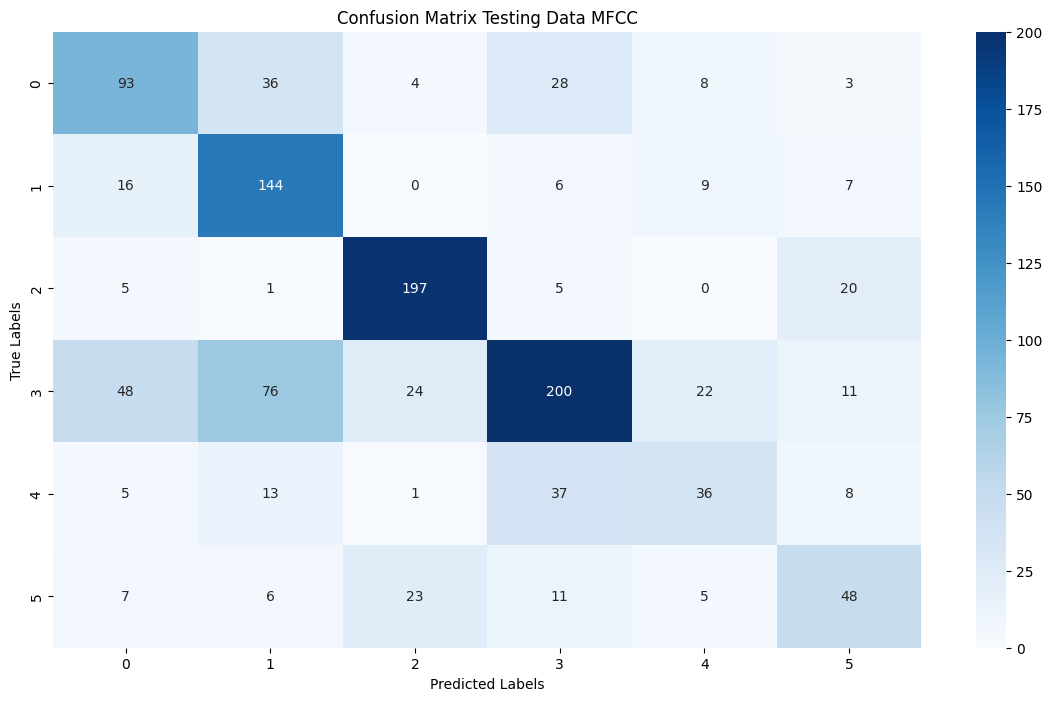


Classification Report:
              precision    recall  f1-score   support

      0Pitta       0.53      0.54      0.54       172
      1Dryoc       0.52      0.79      0.63       182
      2Capri       0.79      0.86      0.83       228
      3Pnoep       0.70      0.52      0.60       381
      4Anthi       0.45      0.36      0.40       100
      5Bucer       0.49      0.48      0.49       100

    accuracy                           0.62      1163
   macro avg       0.58      0.59      0.58      1163
weighted avg       0.63      0.62      0.61      1163



In [27]:
from sklearn.metrics import classification_report
# Evaluasi model
accuracy = model_mfcc2.evaluate(test_set2)
print('\nTest Accuracy:', accuracy[1])

# Prediksi
pred = model_mfcc2.predict(test_set2)
y_pred = np.argmax(pred, axis=1)

# True labels
y_true = test_set2.classes

# Confusion matrix
print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

# Visualisasi confusion matrix
f, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues", ax=ax)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Testing Data MFCC")
plt.show()

# Classification report
report = classification_report(y_true, y_pred, target_names=test_set2.class_indices.keys())
print("\nClassification Report:")
print(report)

# Save Model MFCC CNN

In [15]:
# Save the model
model_save_path = '/kaggle/working/cnn_mfcc.h5'  # Change this path as needed
model_mfcc2.save(model_save_path)

print(f'Model saved to {model_save_path}')

Model saved to /kaggle/working/cnn_mfcc.h5


In [17]:
import pickle, os

os.makedirs("model_output", exist_ok = True)
pickle.dump(model_mfcc2, open("/kaggle/working/cnn_mfcc.pkl", "wb"))

# Melspec CNN

In [18]:

training_set_melspec = train_datagen.flow_from_directory('/kaggle/input/dl-20242025-itera-west-indonesia-birds-dataset/split_data/melspec_split/train',
                                                 target_size = (64, 64),
                                                 shuffle=True)

val_set_melspec = test_datagen.flow_from_directory('/kaggle/input/dl-20242025-itera-west-indonesia-birds-dataset/split_data/melspec_split/val',
                                            target_size = (64, 64),
                                            shuffle=False)

Found 5517 images belonging to 6 classes.
Found 1169 images belonging to 6 classes.


In [ ]:
def create_melspec_cnn():
    model=models.Sequential()
    
    # Convolutional Layer 1
    model.add(layers.Conv2D(64, (2, 2), activation='relu',  input_shape=(64, 64, 3), padding='same'))
    model.add(layers.Conv2D(64, (2, 2), activation='relu',  padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Convolutional Layer 2
    model.add(layers.Conv2D(128, (2, 2), activation='relu',  padding='same'))
    model.add(layers.Conv2D(128, (2, 2), activation='relu',  padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(256, (2, 2), activation='relu',  padding='same'))
    model.add(layers.Conv2D(256, (2, 2), activation='relu',  padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Dropout(0.3))

    # Convolutional Layer 4
    model.add(layers.Conv2D(512, (3, 3), activation='relu',  padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu',  padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Dropout(0.5))
    
    # Flatten Layer
    model.add(layers.Flatten())
    # Fully Connected Layer 1
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(layers.Dropout(0.25))
    
    # Fully Connected Layer 2
    model.add(layers.Dense(2048, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(layers.Dropout(0.25))

    # Fully Connected Layer 3
    model.add(layers.Dense(1024, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(layers.Dropout(0.3))

    # Fully Connected Layer 4
    model.add(layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(layers.Dropout(0.3))

    # Fully Connected Layer 5
    model.add(layers.Dense(6, activation='softmax'))  # Ganti 10 dengan jumlah kelas yang sesuai
    
    return model

model_melspec=create_melspec_cnn()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import tensorflow as tf

#  Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compile model dengan Adam
model_melspec.compile(optimizer=optimizer,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# fungsi learning rate schedule function
def lr_schedule(epoch, lr):
    if epoch > 10:
        lr = lr * 0.9  # Contoh: mengurangi learning rate setelah epoch ke-10
    return lr

# LearningRateScheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# Early Stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=5,  # Berhenti jika tidak ada perbaikan selama 5 epoch
    min_delta=0.001,  # Perbaikan minimal yang dianggap signifikan
    restore_best_weights=True  # Kembalikan bobot terbaik sebelum berhenti
)

# Display model summary
model_melspec.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 64)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 256)    │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 256)    │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4096)           │    33,558,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2048)           │     8,390,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,624,774 (185.49 MB)

 Trainable params: 48,624,774 (185.49 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from keras.callbacks import History
history = History()

history_melspec = model_melspec.fit(
    training_set_melspec, validation_data = val_set_melspec,
    batch_size=32,
    epochs=50,
    callbacks=[lr_scheduler, early_stopping, history]
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


173/173 ━━━━━━━━━━━━━━━━━━━━ 114s 572ms/step - accuracy: 0.3796 - loss: 9.3169 - val_accuracy: 0.6373 - val_loss: 4.9866 - learning_rate: 1.0000e-04
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 48s 265ms/step - accuracy: 0.6258 - loss: 4.5783 - val_accuracy: 0.7399 - val_loss: 3.3888 - learning_rate: 1.0000e-04
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 49s 272ms/step - accuracy: 0.7058 - loss: 3.1772 - val_accuracy: 0.7596 - val_loss: 2.6435 - learning_rate: 1.0000e-04
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 48s 268ms/step - accuracy: 0.7584 - loss: 2.4940 - val_accuracy: 0.8024 - val_loss: 2.1413 - learning_rate: 1.0000e-04
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 48s 269ms/step - accuracy: 0.7786 - loss: 2.0685 - val_accuracy: 0.8015 - val_loss: 1.8481 - learning_rate: 1.0000e-04
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 47s 263ms/step - accuracy: 0.7989 - loss: 1.7515 - val_accuracy: 0.7690 - val_loss: 1.6554 - learning_rate: 1.0000e-04
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 48s 267ms/step -

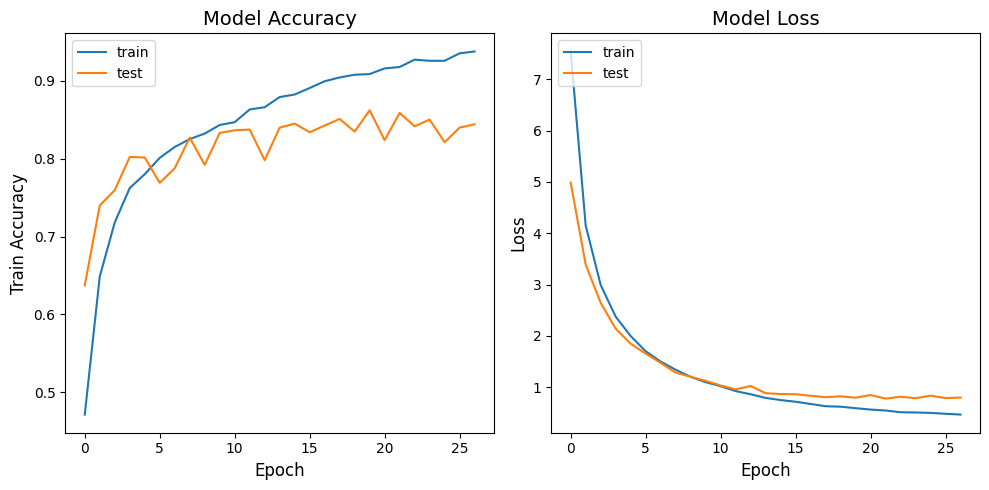

In [23]:
import matplotlib.pyplot as plt

# Membuat figure dan axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot akurasi
ax1.plot(history_melspec.history['accuracy'], label='train')
ax1.plot(history_melspec.history['val_accuracy'], label='test')
ax1.set_title('Model Accuracy', fontsize=14)
ax1.set_ylabel('Train Accuracy', fontsize=12)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.legend(loc='upper left')

# Plot loss
ax2.plot(history_melspec.history['loss'], label='train')
ax2.plot(history_melspec.history['val_loss'], label='test')
ax2.set_title('Model Loss', fontsize=14)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.legend(loc='upper left')

# Menampilkan plot
plt.tight_layout()
plt.show()

37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 205ms/step - accuracy: 0.8780 - loss: 0.7222
Val Accuracy: 0.8588536977767944
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 195ms/step
Confusion Matrix:
[[195  18   3   2   1   3]
 [  3 176   6   2   2   9]
 [ 34  10 240   0   0   6]
 [  0   6   0 262   9   0]
 [  0   2   1   4  66   1]
 [ 17  12  11   0   3  65]]


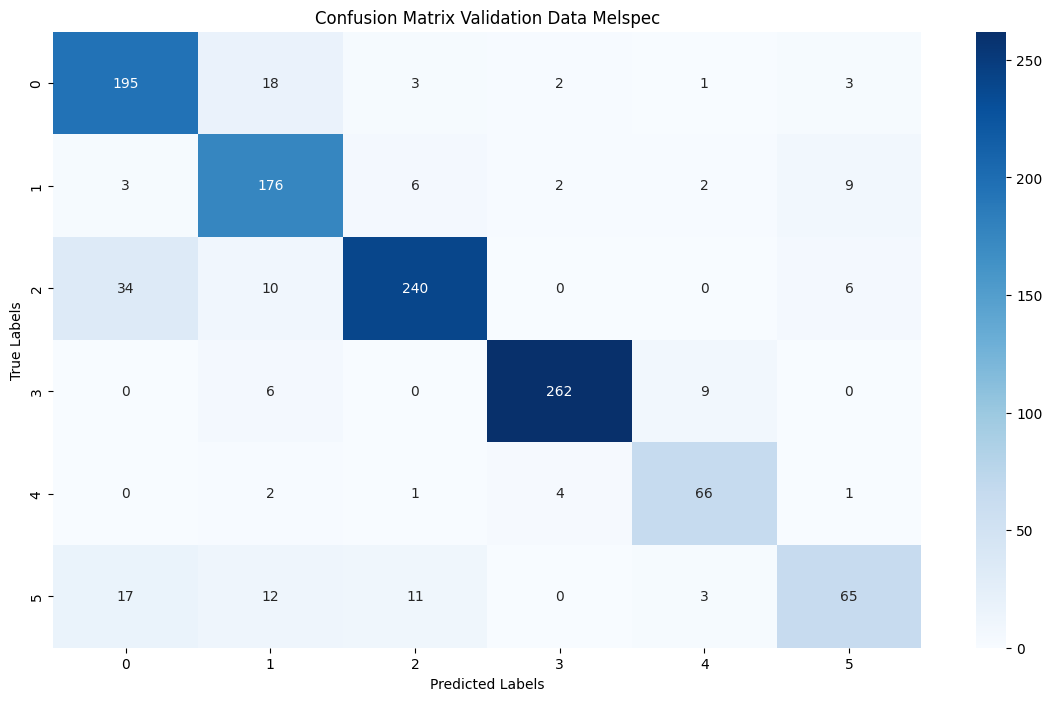


Classification Report:
              precision    recall  f1-score   support

      0Pitta       0.78      0.88      0.83       222
      1Dryoc       0.79      0.89      0.83       198
      2Capri       0.92      0.83      0.87       290
      3Pnoep       0.97      0.95      0.96       277
      4Anthi       0.81      0.89      0.85        74
      5Bucer       0.77      0.60      0.68       108

    accuracy                           0.86      1169
   macro avg       0.84      0.84      0.84      1169
weighted avg       0.86      0.86      0.86      1169



In [33]:
from sklearn.metrics import classification_report
# Evaluasi model
acc = model_melspec.evaluate(val_set_melspec)
print('Val Accuracy:', acc[1])

# Prediksi
pred = model_melspec.predict(val_set_melspec)
y_pred = np.argmax(pred, axis=1)

# True labels
y_true = val_set_melspec.classes

# Confusion matrix
print('Confusion Matrix:')
conf_matrix2 = confusion_matrix(y_true, y_pred)
print(conf_matrix2)

# Visualisasi confusion matrix
f, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(conf_matrix2, annot=True, fmt=".0f", cmap="Blues", ax=ax)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Validation Data Melspec")
plt.show()

# Classification report
report = classification_report(y_true, y_pred, target_names=val_set_melspec.class_indices.keys())
print("\nClassification Report:")
print(report)

In [28]:
test_datagen2 = ImageDataGenerator(rescale = 1./255)
test_set_melspec = test_datagen2.flow_from_directory('/kaggle/input/dl-20242025-itera-west-indonesia-birds-dataset/split_data/melspec_split/test',
                                            target_size = (64, 64),
                                            shuffle=False)#berbeda dengan test_set diatas, diatas menggunakan validasi sedangkan ini menggunakan data dari folder test

Found 1218 images belonging to 6 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 399ms/step - accuracy: 0.8307 - loss: 0.8007

Test Accuracy: 0.8571428656578064
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step
Confusion Matrix:
[[192  46   7   1   0  10]
 [  3 104   5   8   0   3]
 [  7   9 355   1   0  10]
 [  0   2   1 241   1   1]
 [  0   2   2   2  84   0]
 [  5  31   6  10   1  68]]


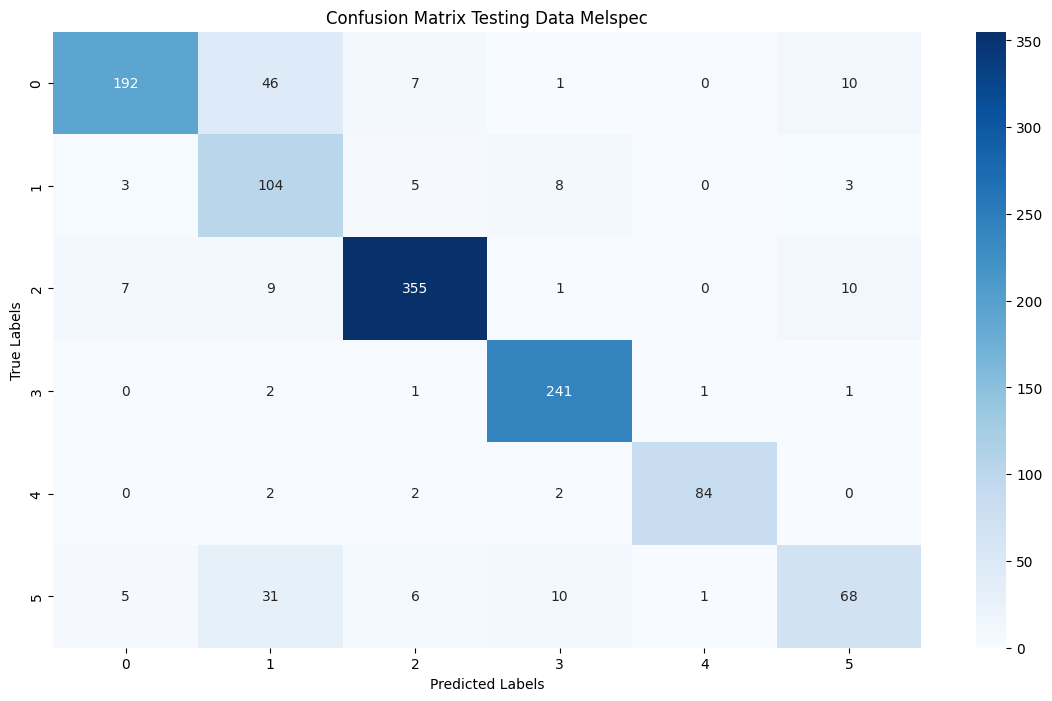


Classification Report:
              precision    recall  f1-score   support

      0Pitta       0.93      0.75      0.83       256
      1Dryoc       0.54      0.85      0.66       123
      2Capri       0.94      0.93      0.94       382
      3Pnoep       0.92      0.98      0.95       246
      4Anthi       0.98      0.93      0.95        90
      5Bucer       0.74      0.56      0.64       121

    accuracy                           0.86      1218
   macro avg       0.84      0.83      0.83      1218
weighted avg       0.88      0.86      0.86      1218



In [30]:
from sklearn.metrics import classification_report
# Evaluasi model
accuracy1 = model_melspec.evaluate(test_set_melspec)
print('\nTest Accuracy:', accuracy1[1])

# Prediksi
pred1 = model_melspec.predict(test_set_melspec)
y_pred1 = np.argmax(pred1, axis=1)

# True labels
y_true1 = test_set_melspec.classes

# Confusion matrix
print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_true1, y_pred1)
print(conf_matrix)

# Visualisasi confusion matrix
f, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues", ax=ax)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Testing Data Melspec")
plt.show()

# Classification report
report = classification_report(y_true1, y_pred1, target_names=test_set_melspec.class_indices.keys())
print("\nClassification Report:")
print(report)

# Save Model Melspec CNN

In [32]:
# Save the model
model_save_path = '/kaggle/working/cnn_melspec.h5'  # Change this path as needed
model_melspec.save(model_save_path)

print(f'Model saved to {model_save_path}')

import pickle, os

os.makedirs("model_output", exist_ok = True)
pickle.dump(model_melspec, open("/kaggle/working/cnn_melspec.pkl", "wb"))

Model saved to /kaggle/working/cnn_melspec.h5
